# 皮马印第安人糖尿病 Train logistic regression model

## 数据清洗和处理

使用pandas库导入数据集文件

In [8]:
import pandas as pd
in_data = pd.read_csv('E:\workspace\大三上\神经网络与深度学习\第一次作业\数据集\diabetes.csv', na_values=['NA'])
in_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


pandas.DataFrame.describe  
返回值为数据的统计数据  

In [9]:
in_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


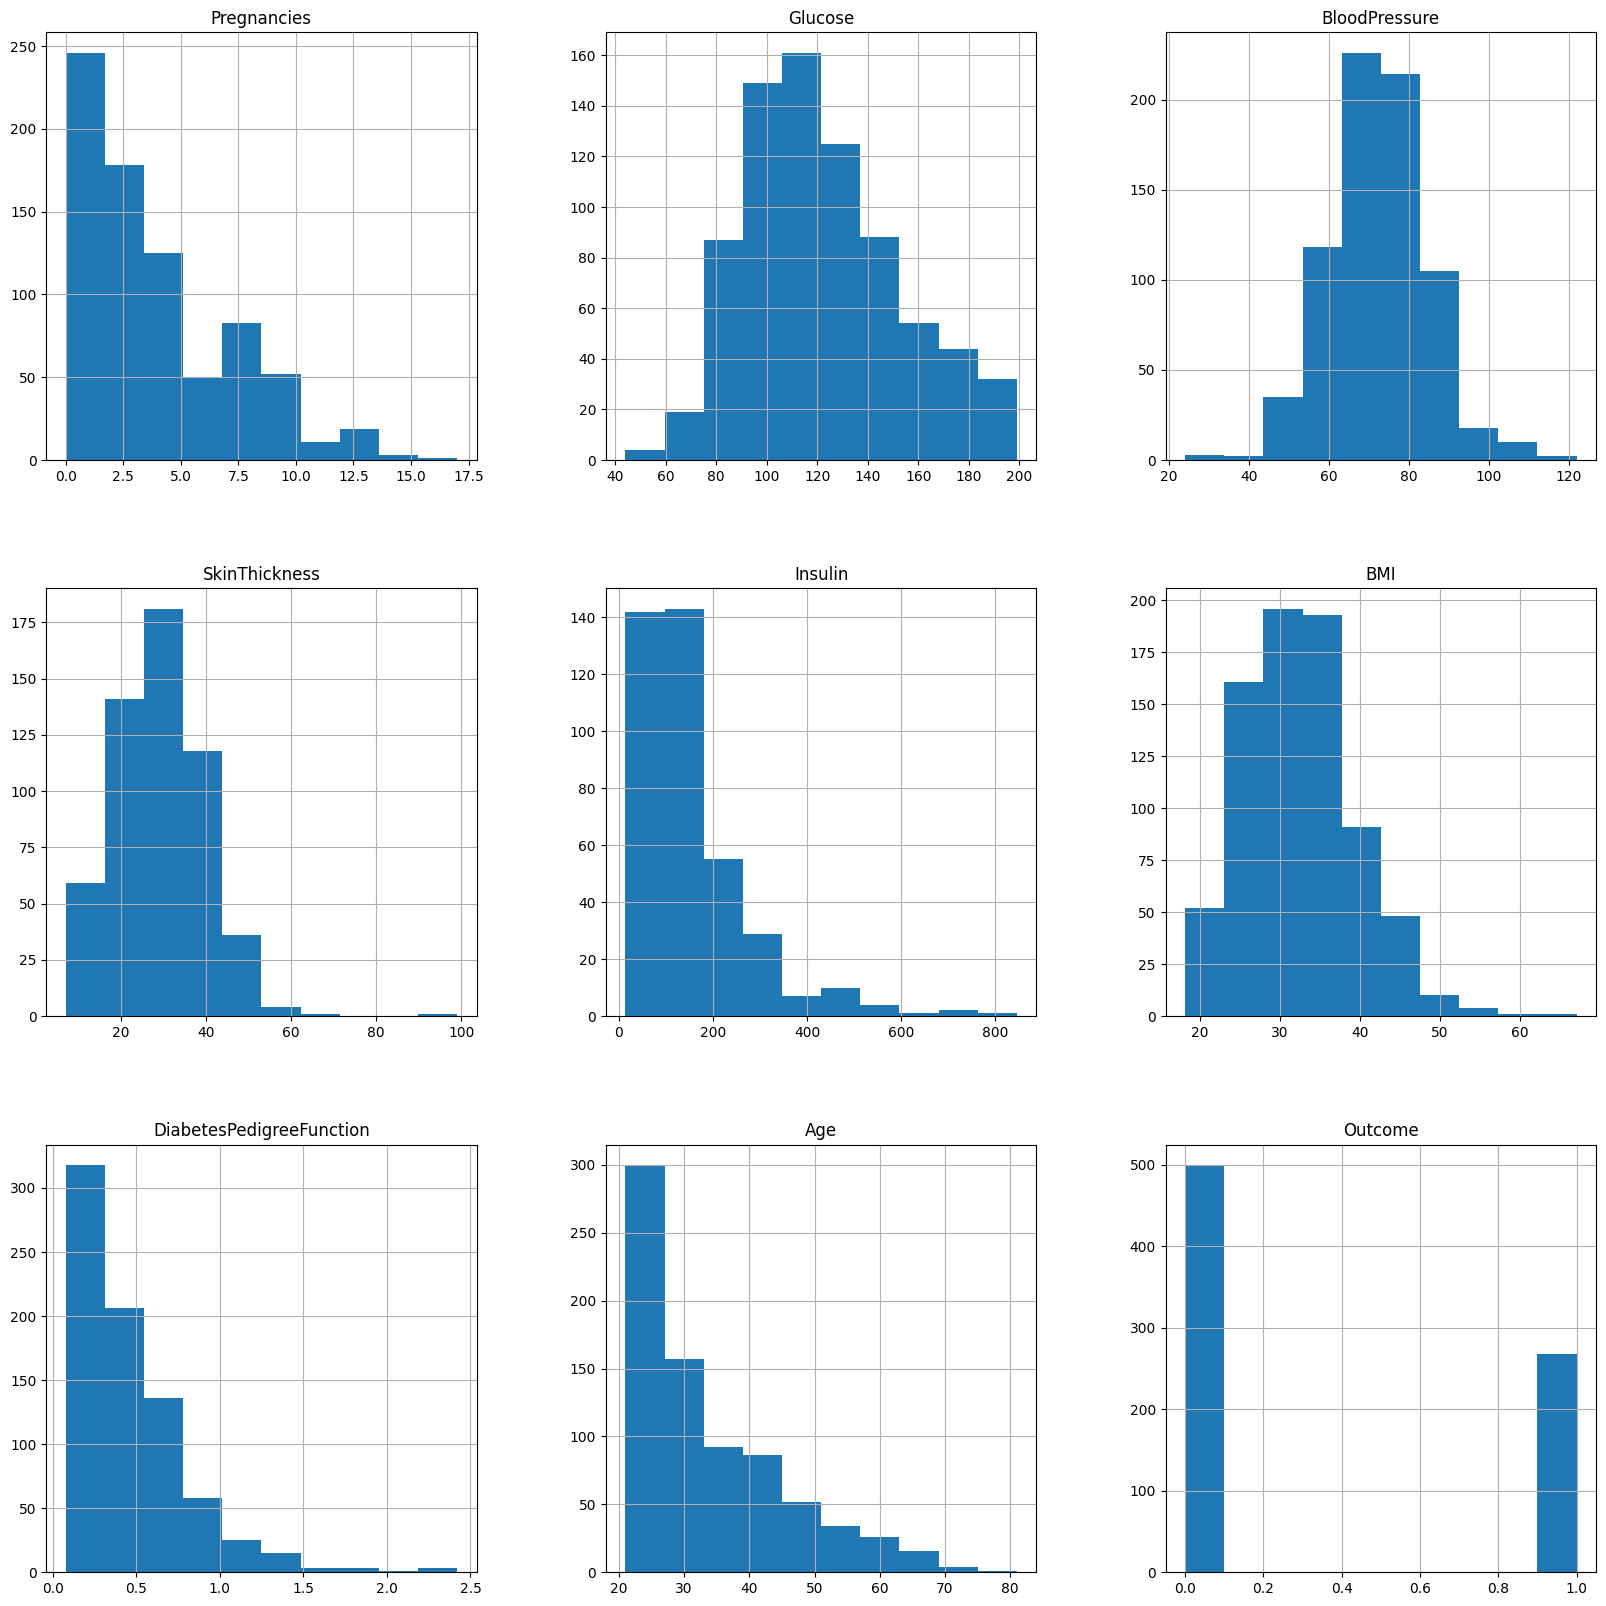

In [14]:
pic = in_data.hist(figsize = (20,20))

可以看到，BMI、BloodPressure等理应没有0值，但是存在部分0值，应该设为NaN

In [12]:
import numpy as np
colume = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
in_data[colume] = in_data[colume].replace(0,np.nan)

查看数据的缺失情况

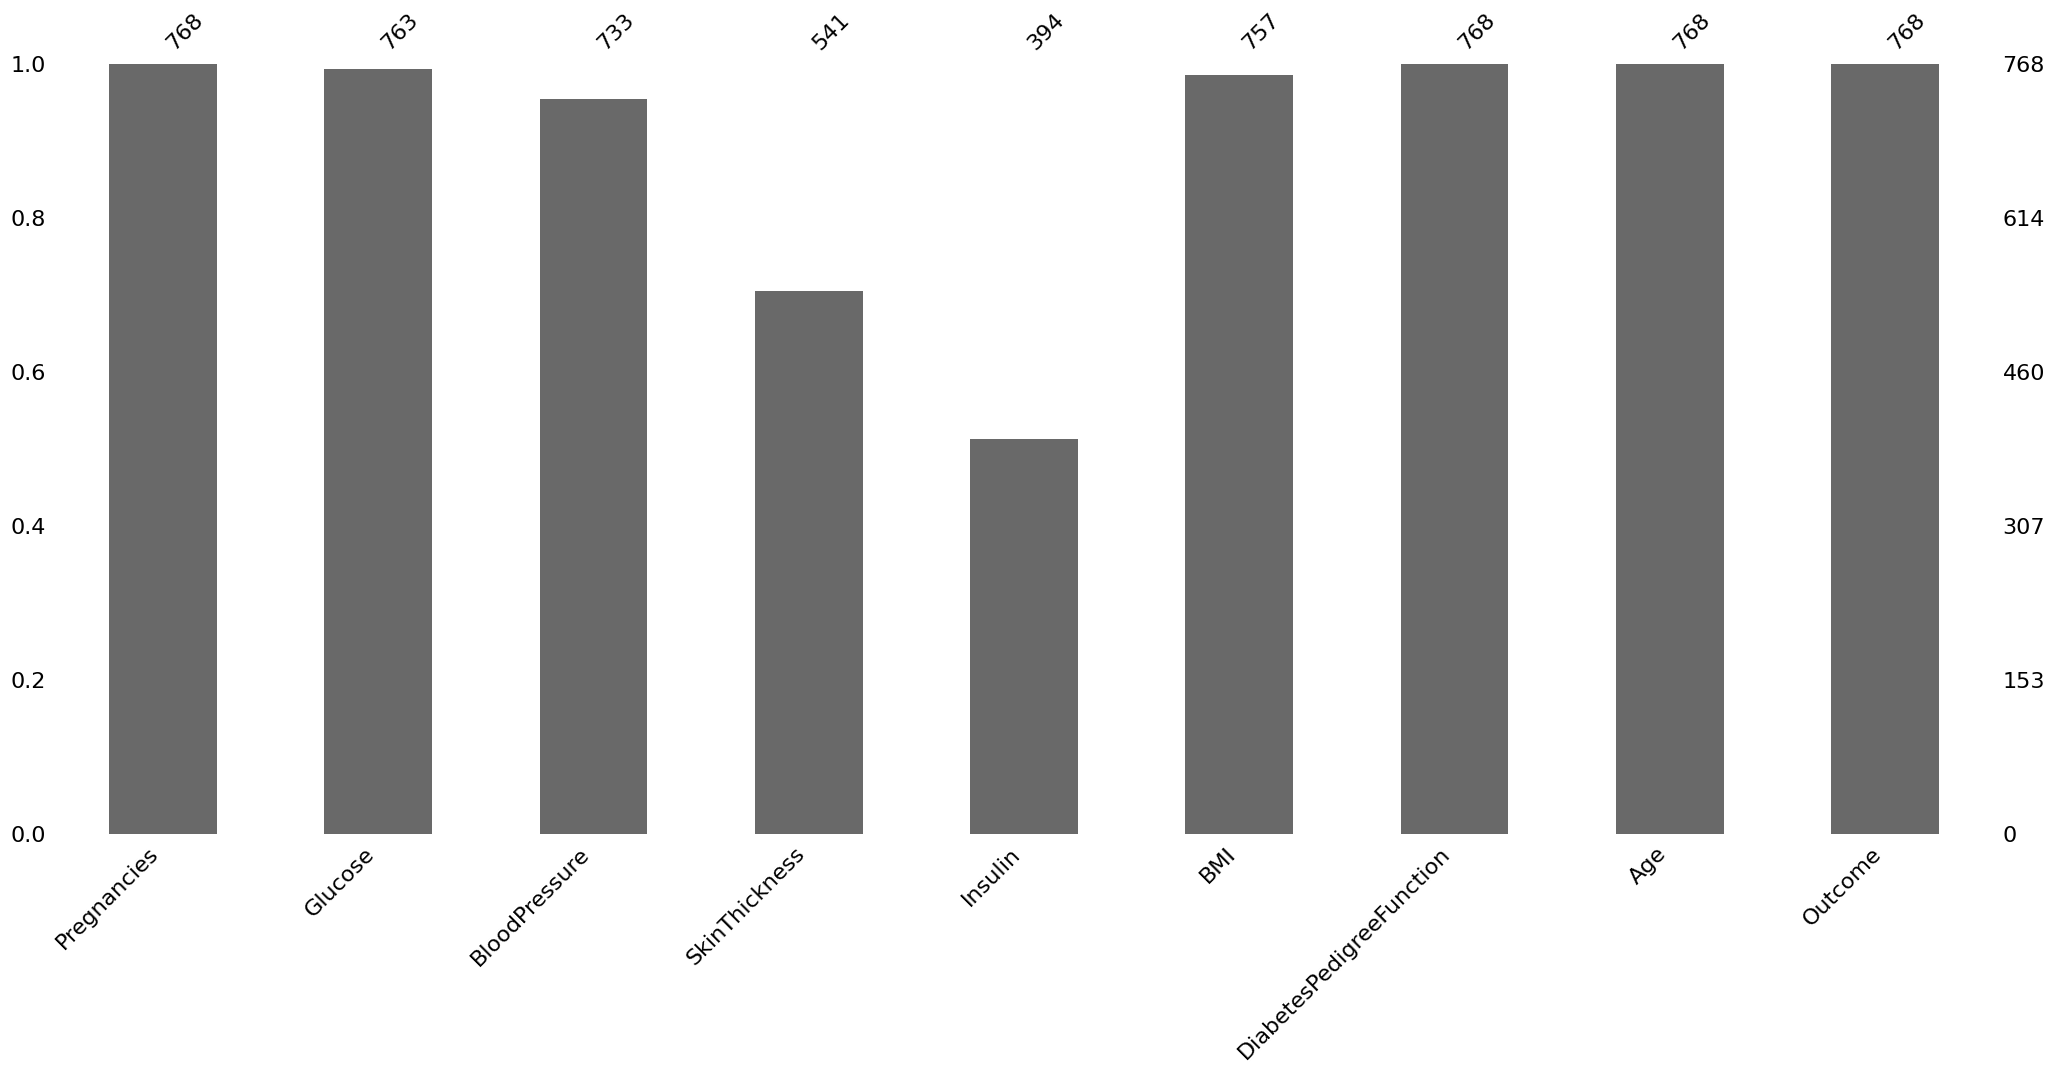

In [13]:
import missingno as msno
defi = msno.bar(in_data)

pandas.DataFrame.shape  
返回值为数据的维度  
pandas.DataFrame.dropna  
DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)   
设置thresh值，保留数量大于thresh值的数据，删除了Insulin、SkinThickness

(768, 9)


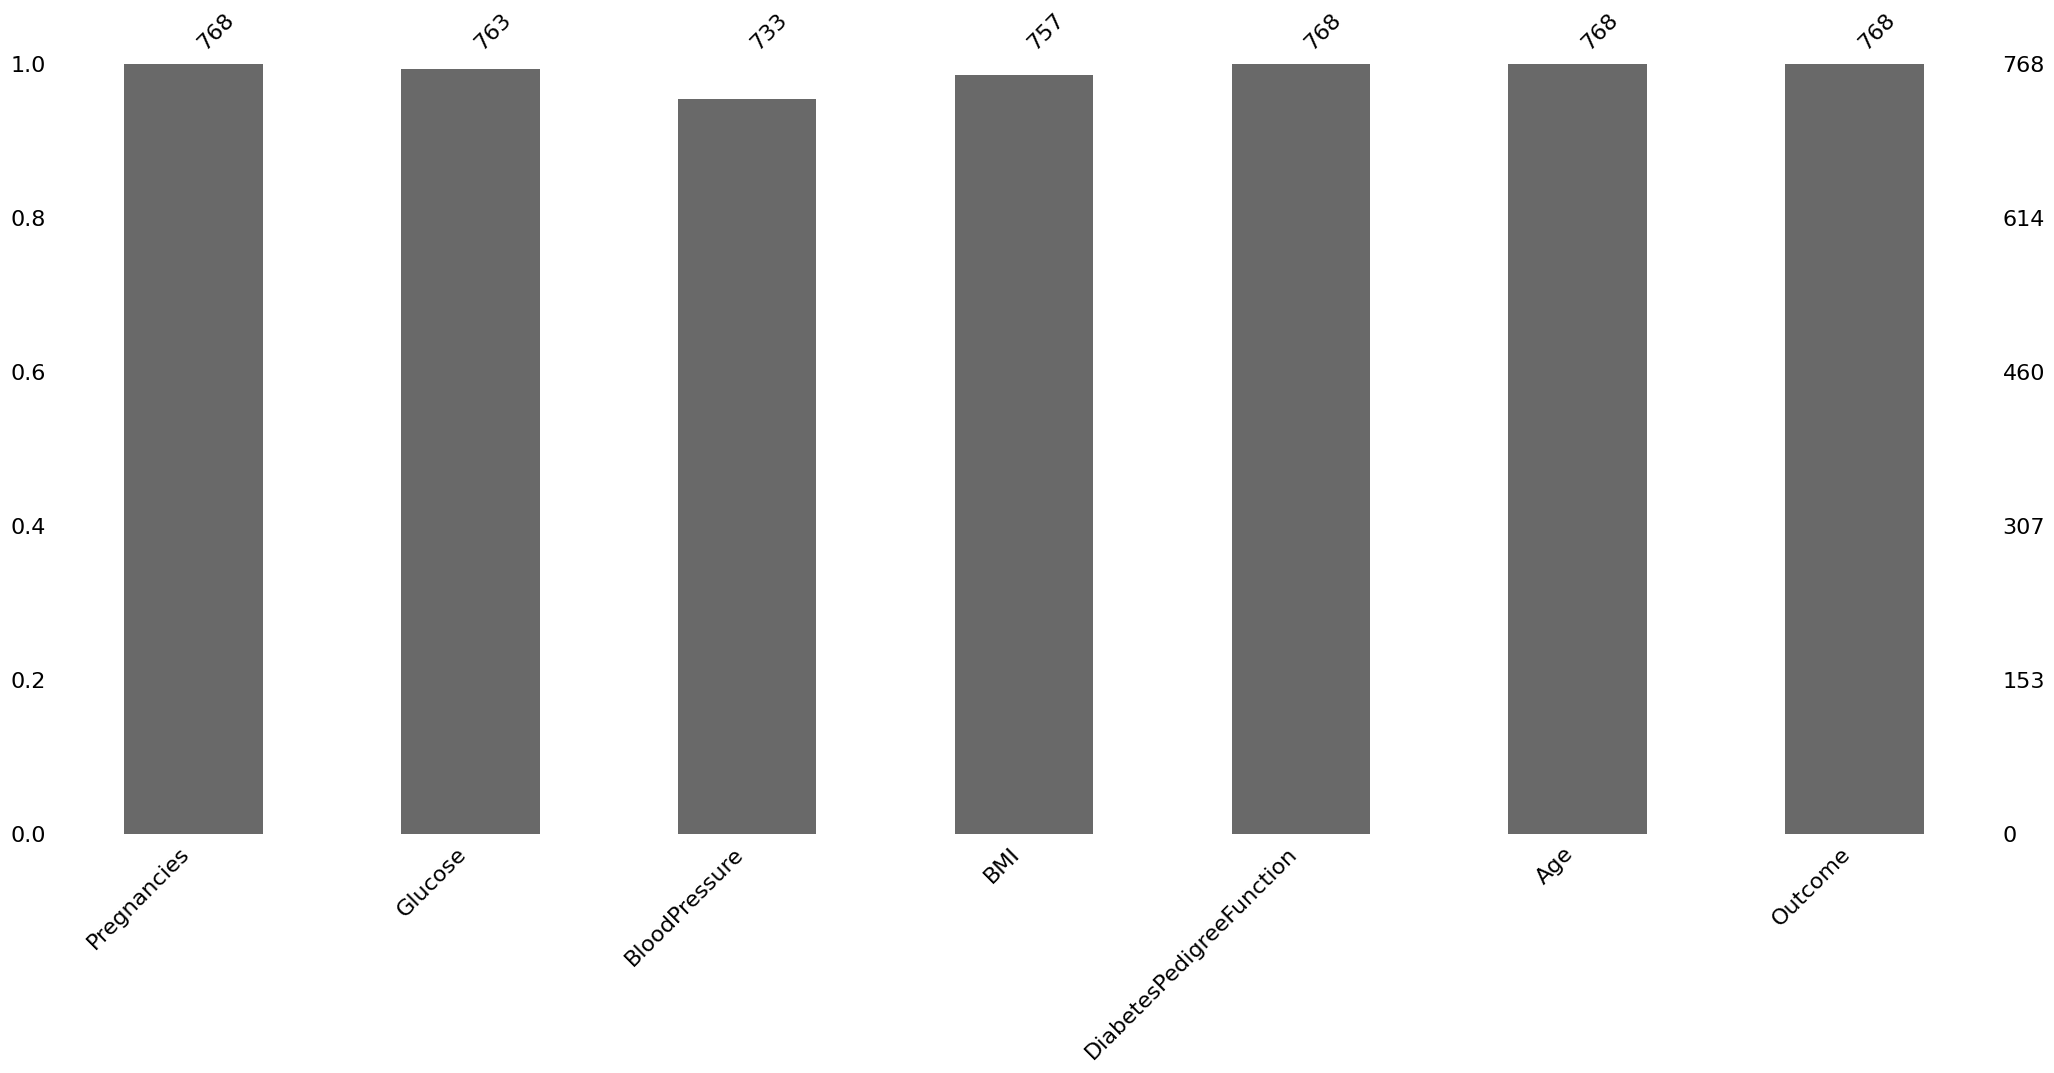

In [15]:
print(in_data.shape)
thresh_count = in_data.shape[0]*0.8
in_data = in_data.dropna(thresh=thresh_count, axis=1)
defi = msno.bar(in_data)

对缺失数据进行插补  
使用均值填充|

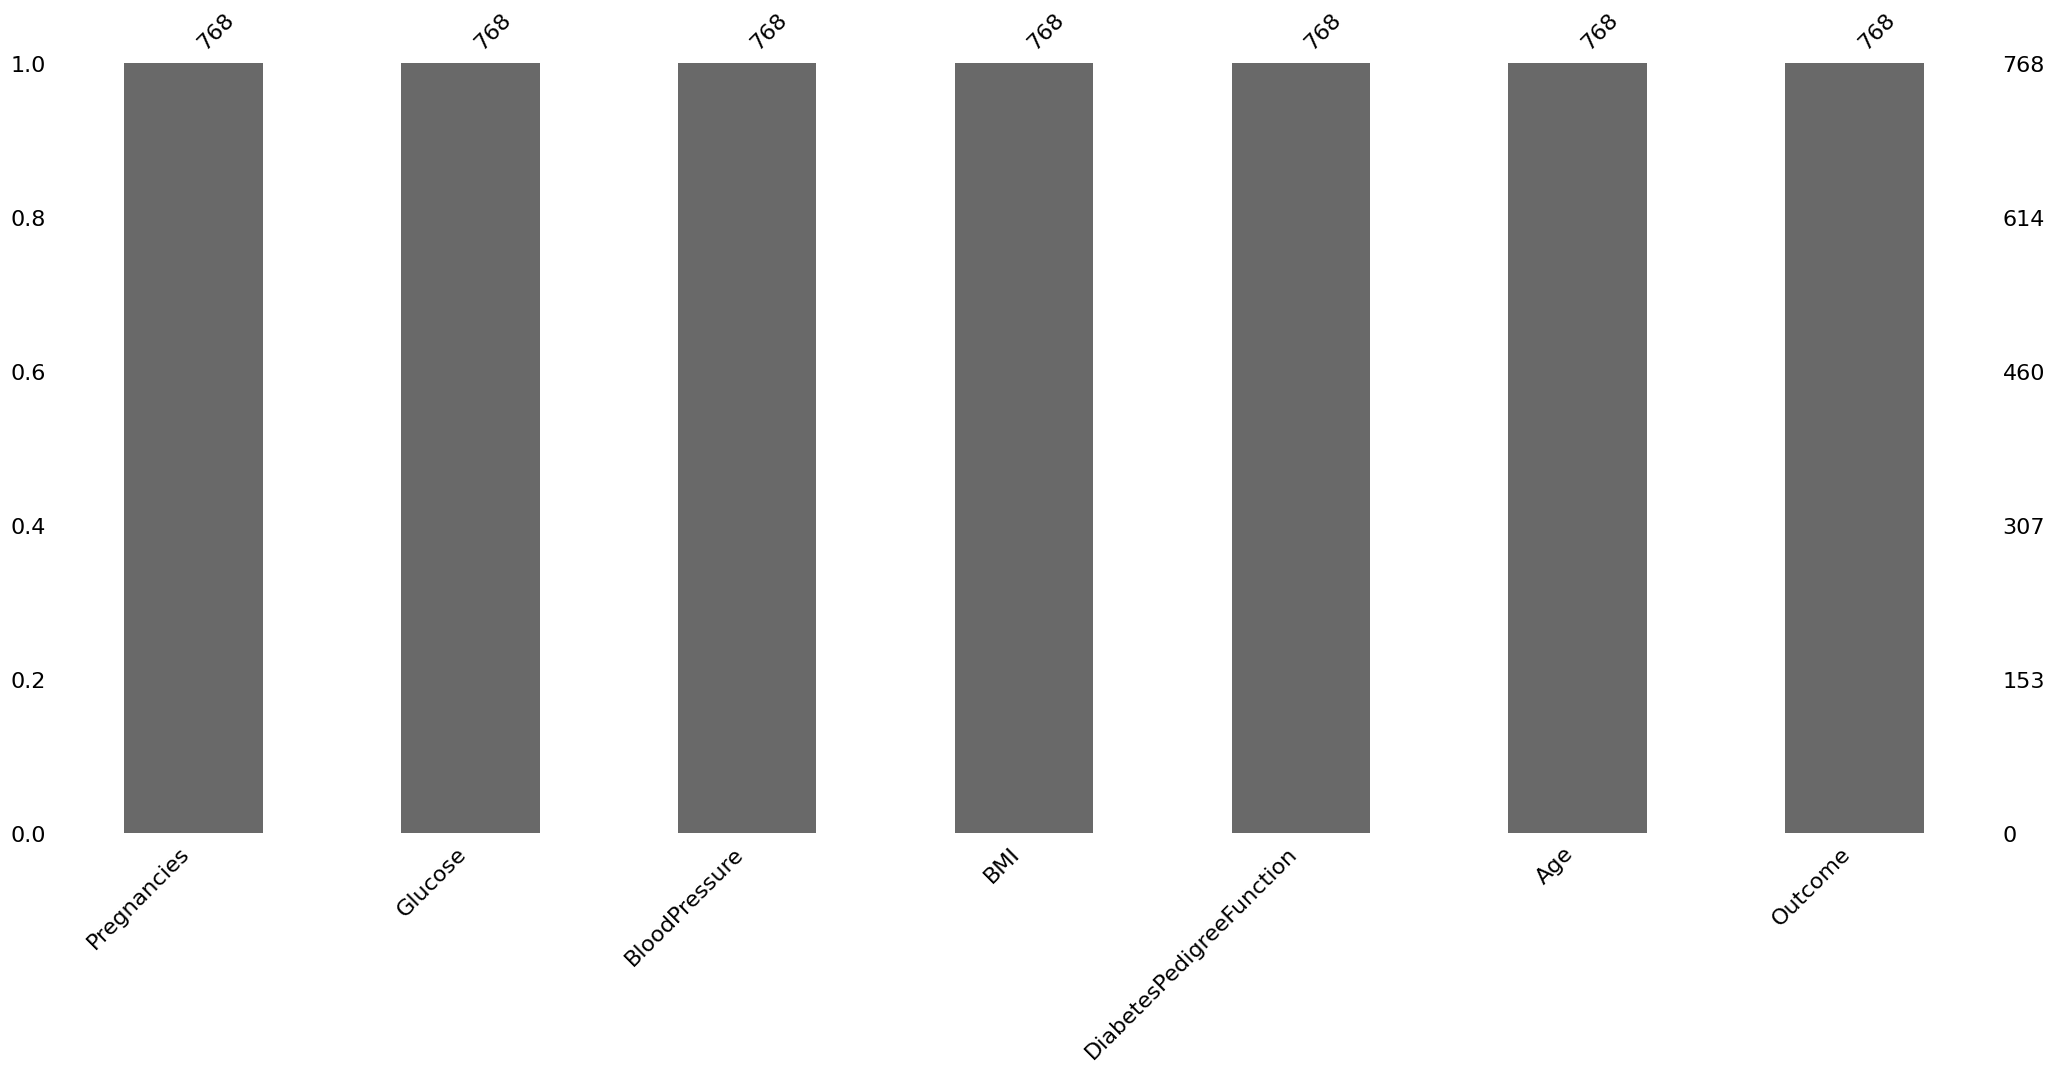

In [18]:
from sklearn.impute import SimpleImputer

mean = SimpleImputer(missing_values=np.nan, strategy='mean')
column = ['Glucose', 'BloodPressure', 'BMI']

in_data[column] = mean.fit_transform(in_data[column])
defi = msno.bar(in_data)

## 数据的相关性

绘制热力图

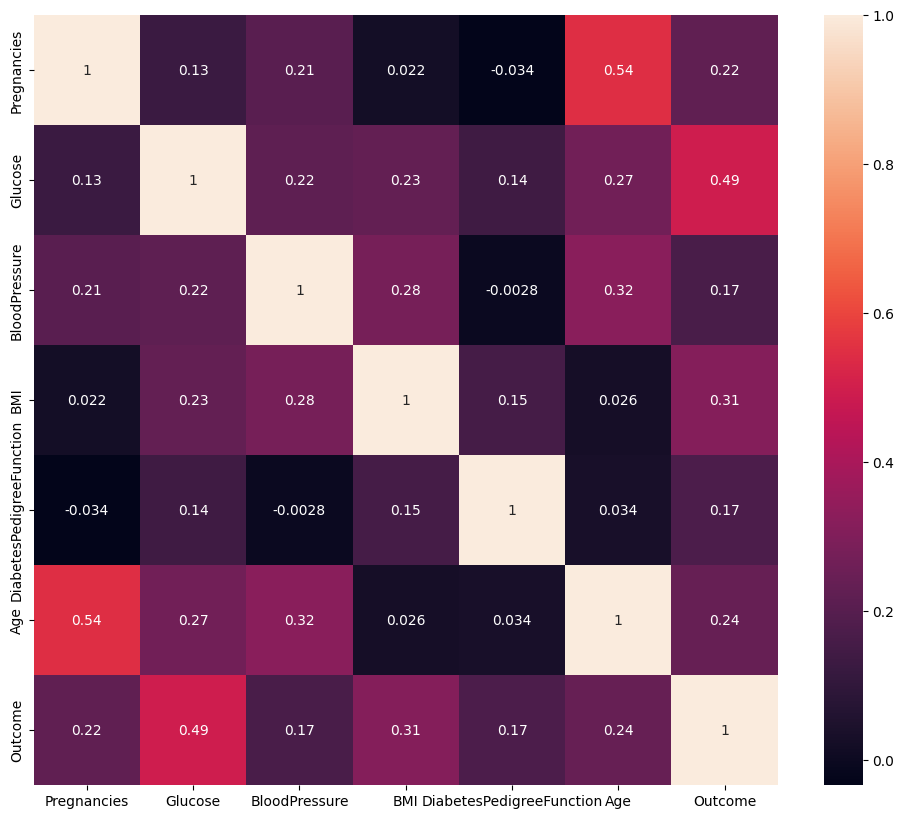

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
p = sns.heatmap(in_data.corr(), annot=True)

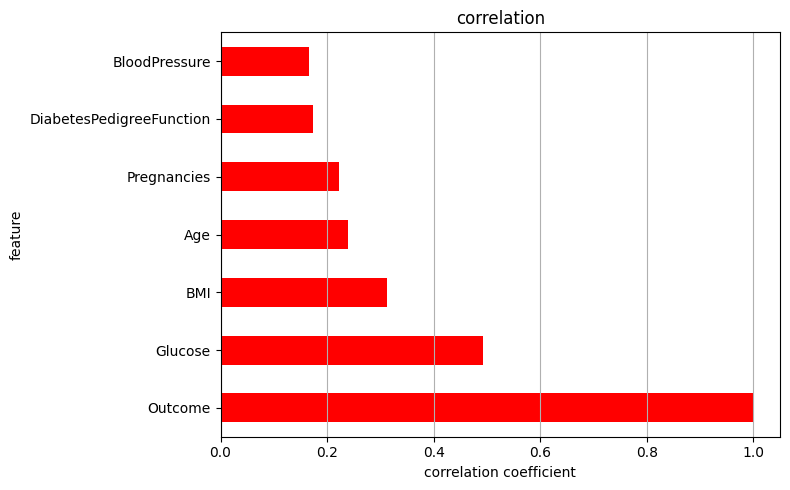

In [22]:
correlations = in_data.corrwith(in_data['Outcome']).dropna().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
correlations.plot(kind='barh', color='red')
plt.title('correlation')  
plt.xlabel('correlation coefficient')  
plt.ylabel('feature')    
plt.grid(axis='x')
plt.tight_layout()
plt.show()

可以看到，Glucose和outcome的相关性最大

## 逻辑回归模型

数据标准化处理

使用StandardScaler库，使用平均值填充

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(in_data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,1.548980,5.484909,-0.020496


数据集拆分  学号2021213519
train_size 为0.7 、0.75 、0.80  
修改test_size变量的大小即可

In [26]:
test_size = 0.2 #修改此值即可
from sklearn.model_selection import train_test_split
y = in_data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

逻辑回归

其中输出的Accurcy为模型的准确率
probabilities为每个数据的预测概率

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# l1 regularization gives better results
lr = LogisticRegression(penalty="l2",solver="sag", C=0.5,max_iter=1000, random_state=2, multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
probabilities = lr.predict_proba(X_test)
# 计算预测准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(probabilities)

Accuracy: 0.8051948051948052
[[0.0440173  0.9559827 ]
 [0.83828078 0.16171922]
 [0.91154764 0.08845236]
 [0.33521075 0.66478925]
 [0.88601749 0.11398251]
 [0.96588098 0.03411902]
 [0.23672589 0.76327411]
 [0.14095531 0.85904469]
 [0.57410261 0.42589739]
 [0.62207391 0.37792609]
 [0.38212346 0.61787654]
 [0.03316703 0.96683297]
 [0.73644879 0.26355121]
 [0.84014671 0.15985329]
 [0.89877424 0.10122576]
 [0.86217468 0.13782532]
 [0.13147552 0.86852448]
 [0.97699835 0.02300165]
 [0.62419577 0.37580423]
 [0.75931602 0.24068398]
 [0.36379075 0.63620925]
 [0.57492662 0.42507338]
 [0.919298   0.080702  ]
 [0.94873072 0.05126928]
 [0.94714701 0.05285299]
 [0.67047944 0.32952056]
 [0.95828617 0.04171383]
 [0.0859827  0.9140173 ]
 [0.90053384 0.09946616]
 [0.86155637 0.13844363]
 [0.53616349 0.46383651]
 [0.77068675 0.22931325]
 [0.90531104 0.09468896]
 [0.54618635 0.45381365]
 [0.90208069 0.09791931]
 [0.2748521  0.7251479 ]
 [0.53721204 0.46278796]
 [0.91431504 0.08568496]
 [0.6938997  0.306100

用单个参数作为自变量输入，获取不同自变量的预测准确率

Pregnancies score: 0.6640625
Glucose score: 0.7447916666666666
BloodPressure score: 0.6510416666666666
BMI score: 0.6614583333333334
DiabetesPedigreeFunction score: 0.6588541666666666
Age score: 0.6484375


<Figure size 1200x2500 with 0 Axes>

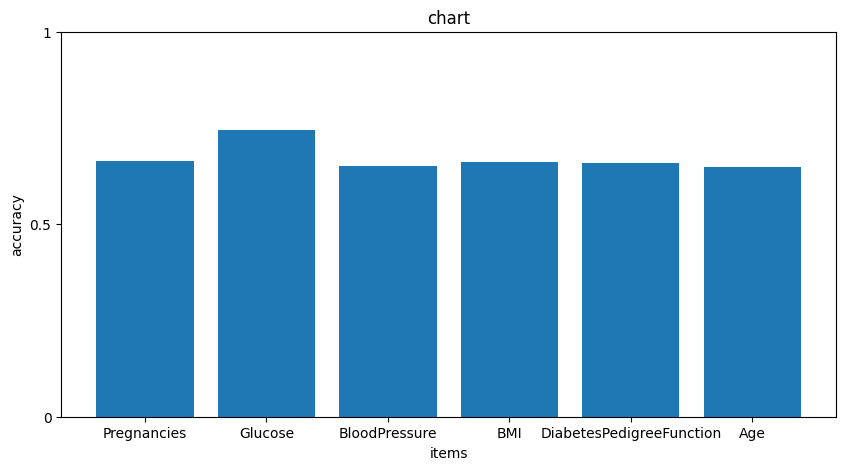

In [32]:
item=[]
res=[]
plt.figure(figsize=(2*6,5*5))
for i,col in enumerate(X.columns):  #enumerate 枚举
    train_X = X.loc[:,col].values.reshape(-1,1)  
# 每一次循环，都取出datafram中的一列数据，是一维Series数据格式，但是线性回归模型要求传入的是一个二维数据，因此利用reshape修改其形状
    train_Y = y
    lr = LogisticRegression(penalty="l2",solver="lbfgs", C=5.0,max_iter=1000, random_state=1, multi_class='ovr')    # 构建模型
    lr.fit(train_X,train_Y)    #训练模型
    y_pred = lr.predict(train_X)
    score = accuracy_score(y_pred, train_Y)   # 评估模型
    item.append(col)
    res.append(score)
    print(col, 'score:',score)


plt.figure(figsize=(10,5))
plt.bar(item, res)
plt.xlabel('items')
plt.ylabel('accuracy')
plt.title('chart')
plt.yticks([0,0.5, 1], ['0', '0.5', '1'])
plt.show()

## 绘制散点图

使用相关性最高的BMI和Gloucose作为自变量输入

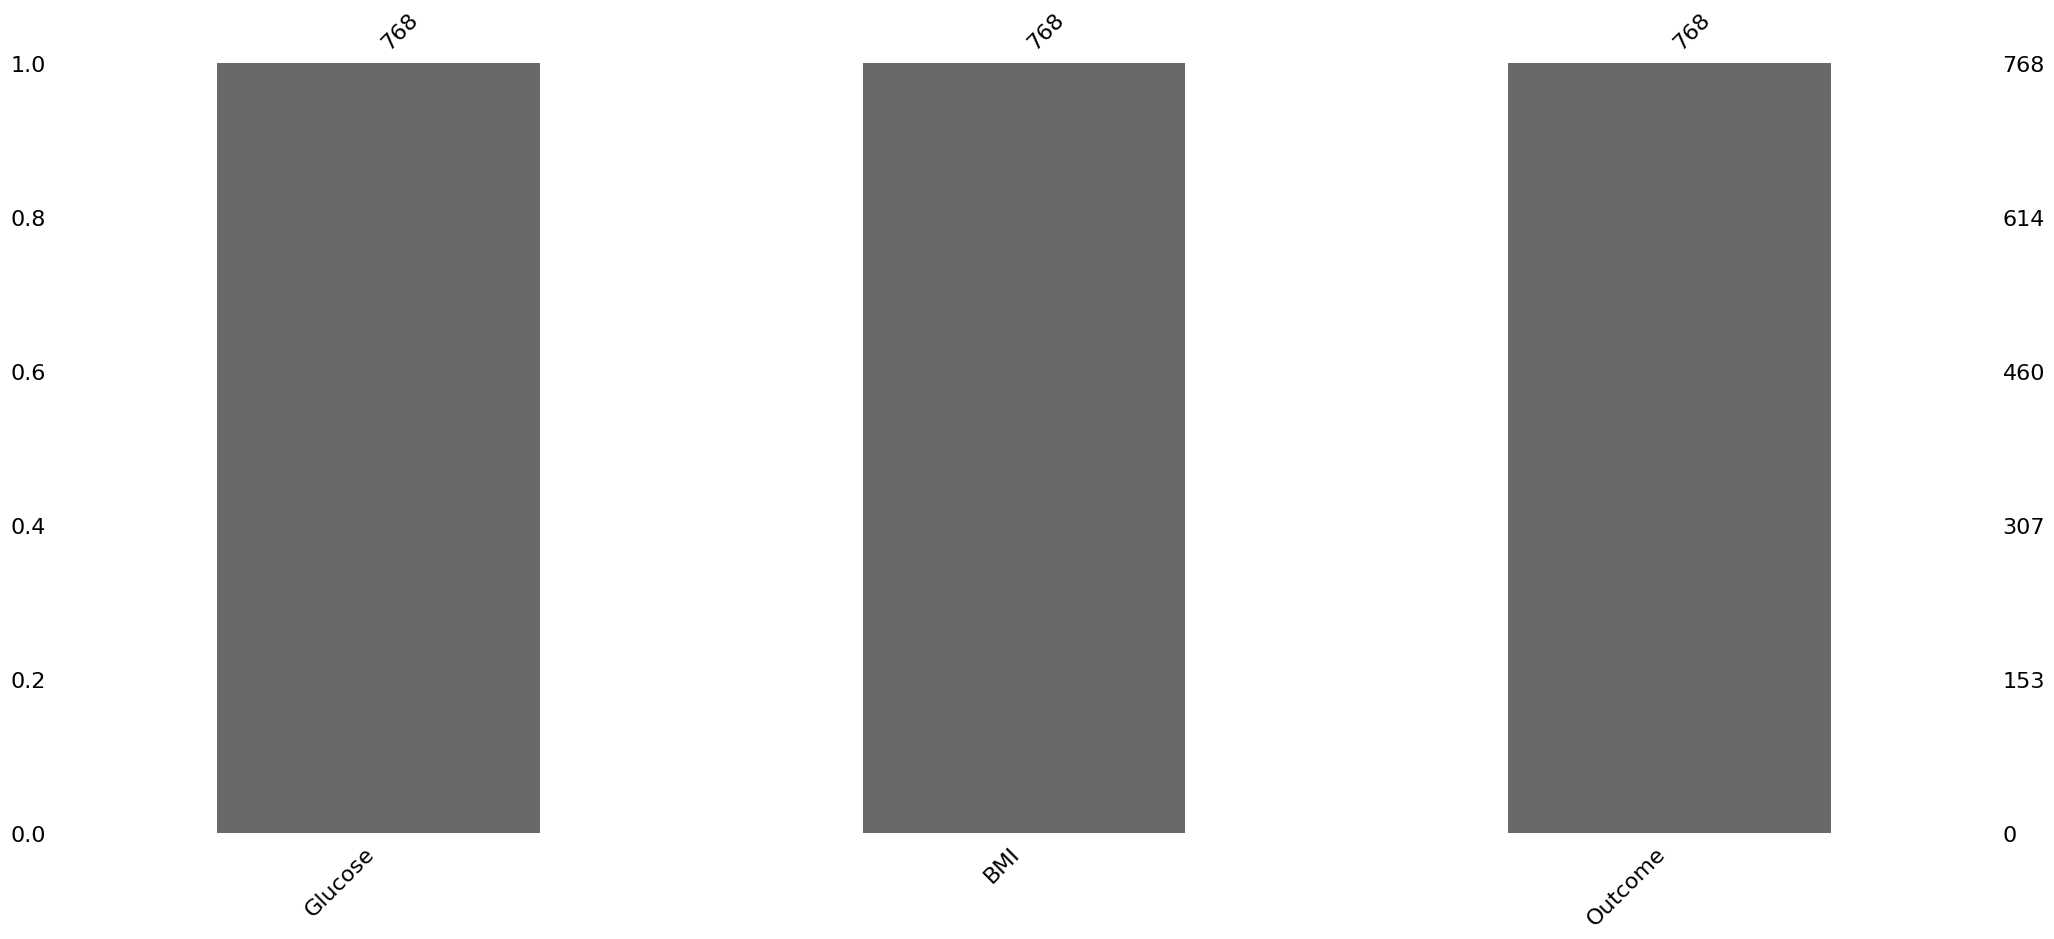

In [34]:
in_data = in_data.drop(['Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age'], axis=1)
p=msno.bar(in_data)

In [36]:
X = pd.DataFrame(sc_X.fit_transform(in_data.drop(["Outcome"],axis = 1),),columns=['Glucose', 'BMI'])
y = in_data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# l1 regularization gives better results
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 计算预测准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print(probabilities1)

Accuracy: 0.7857142857142857


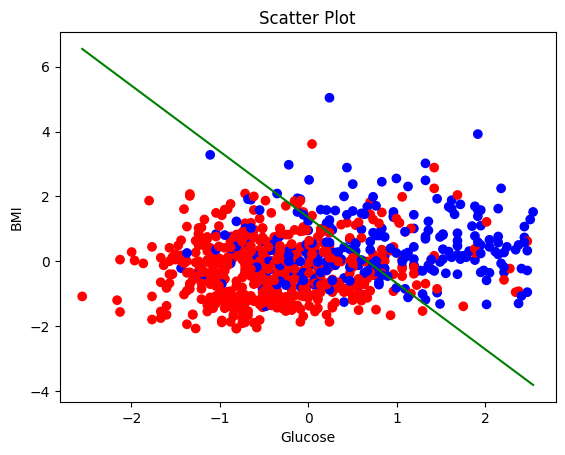

In [39]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'blue'])
x = np.linspace(min(X.iloc[:, 0]),max(X.iloc[:, 0]) , 100)
y = -(lr.intercept_ + lr.coef_[0][0] * x) / lr.coef_[0][1]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=in_data.iloc[:, 2], cmap=cmap)
plt.plot(x, y, color='green')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot')
plt.show()

画出回归直线，可以看到可以对两类图形进行较为准确的分割